## Feature Engineering ##

**Feature Engineering with Linear Regression: Applied to the Ames Housing Data.**

Objectives
+ Simple EDA
+ One-hot Encoding Variables
+ Log Transformation for skewed variables
+ Pair plot for features
+ Basic Feature Engineering: Adding Polynomial and Interaction Terms
+ Feature Engineeeing: Categories and Features derived from category aggregates

**Simple EDA**

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ["retina"]

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


Load the Data, Examine and Explore

In [6]:
data = r"C:\Users\user\Desktop\Downloads\2kd0TgHKSQGHdE4ByjkBKA_fec2b1ed10c444ea99e0458263136c02_Ames_Housing_Data.tsv"
df = pd.read_csv(data, sep = "\t")

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
df.shape

(2930, 82)

In [10]:
## Remove some Outliers ##

df = df.loc[df["Gr Liv Area"] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() ## copy of original data ##

Number of rows in the data: 2925
Number of columns in the data: 82


In [11]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**One-Hot Encoding for Dummy Variable:**

Some Basic Cleaning on this data

+ Convert Categorical variable into Dummies
+ Making skew variables symmetric

In [12]:
## filter by string categoricals ##
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]
## list for categorical fields ##
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [13]:
## One Hot Encoding ##
df = pd.get_dummies(df,columns = one_hot_encode_cols, drop_first = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


Log Transforming skew varibales

In [14]:
## Create a list of float columns to check for skewing ##
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75
skew_vals = data[float_cols].skew()

In [15]:
## Showing the Skewed Columns ##
skew_cols = (skew_vals
            .sort_values(ascending = False)
            .to_frame()
            .rename(columns = {0: "Skew"})
            .query("abs(Skew) > {}" .format(skew_limit)))

skew_cols


,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


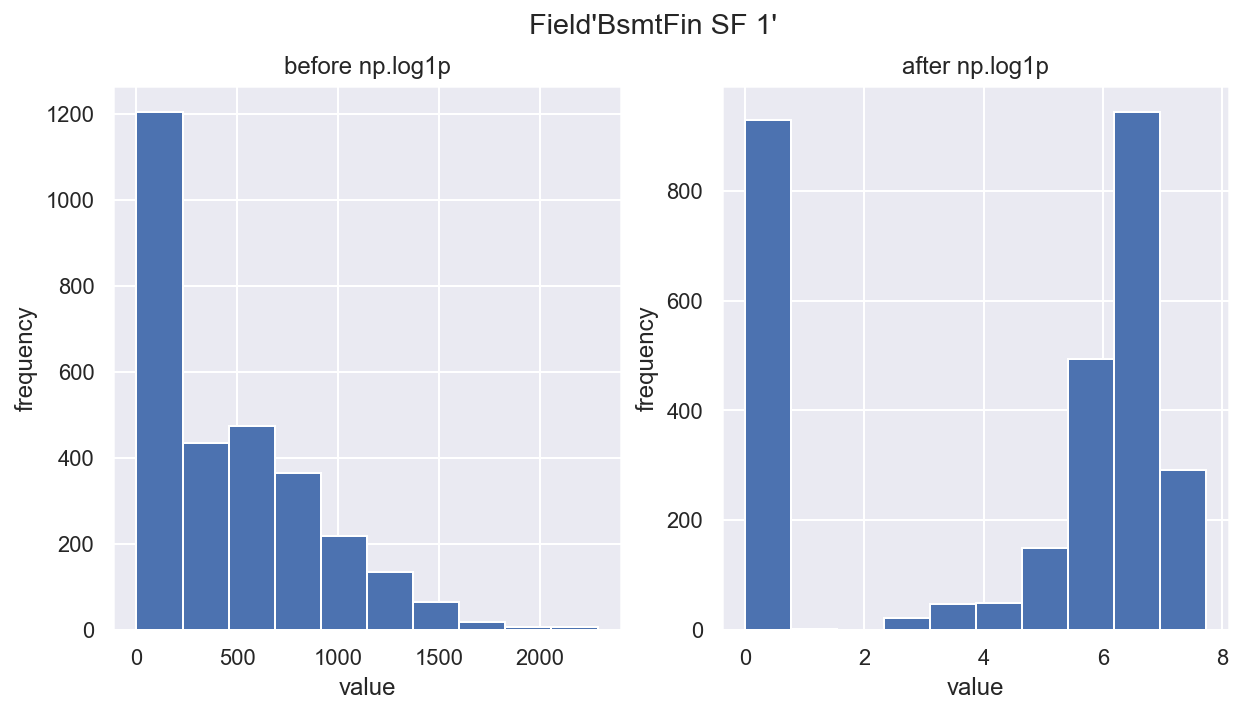

In [17]:
## Check for One Feature ##

## Choosing a filed ##
field = "BsmtFin SF 1"

## Create two "subplots" and a "figure" using matplotlib ##
fig, (ax_before, ax_after) = plt.subplots(1,2,figsize = (10,5))

## Create Histogram on the "ax_before" subplot ##
df[field].hist(ax=ax_before)

## Apply a Log Transformation (numpy syntax) to this column ##
df[field].apply(np.log1p).hist(ax=ax_after)

## Formating of titles etc. for each subplot ##
ax_before.set(title = "before np.log1p", ylabel = "frequency", xlabel = "value")
ax_after.set(title = "after np.log1p", ylabel = "frequency", xlabel = "value")
fig.suptitle("Field'{}'".format(field));

In [18]:
## Perform the skew transformation ##

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [19]:
df.shape

(2925, 262)

Now, there is a larger Data set of potentially useful features

In [20]:
## Check for Missing Values ##
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

Picking few Numeric Features to illustrate Basic Feature Transformations

In [21]:
small_df = df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [22]:
small_df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900


In [23]:
small_df.shape

(2925, 11)

In [24]:
small_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [25]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [26]:
## Check for Missing Value ##
small_df.isnull().sum().sort_values()

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
SalePrice         0
Garage Cars       1
dtype: int64

It seems that there is a Missing Value in "Garage Cars"

In [28]:
## Convert that missing (NA) value to 0 using fillna method ##
small_df = small_df.fillna(0)

In [29]:
small_df.isnull().sum().sort_values()

Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Gr Liv Area       0
Full Bath         0
Bedroom AbvGr     0
Fireplaces        0
Garage Cars       0
SalePrice         0
dtype: int64

There is no Missing value in the Selected Feature. And it is good to go for the next step.

In [30]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


**Pair Plots of Features**

+ Visualize to get better understanding the target and feature-target relationship

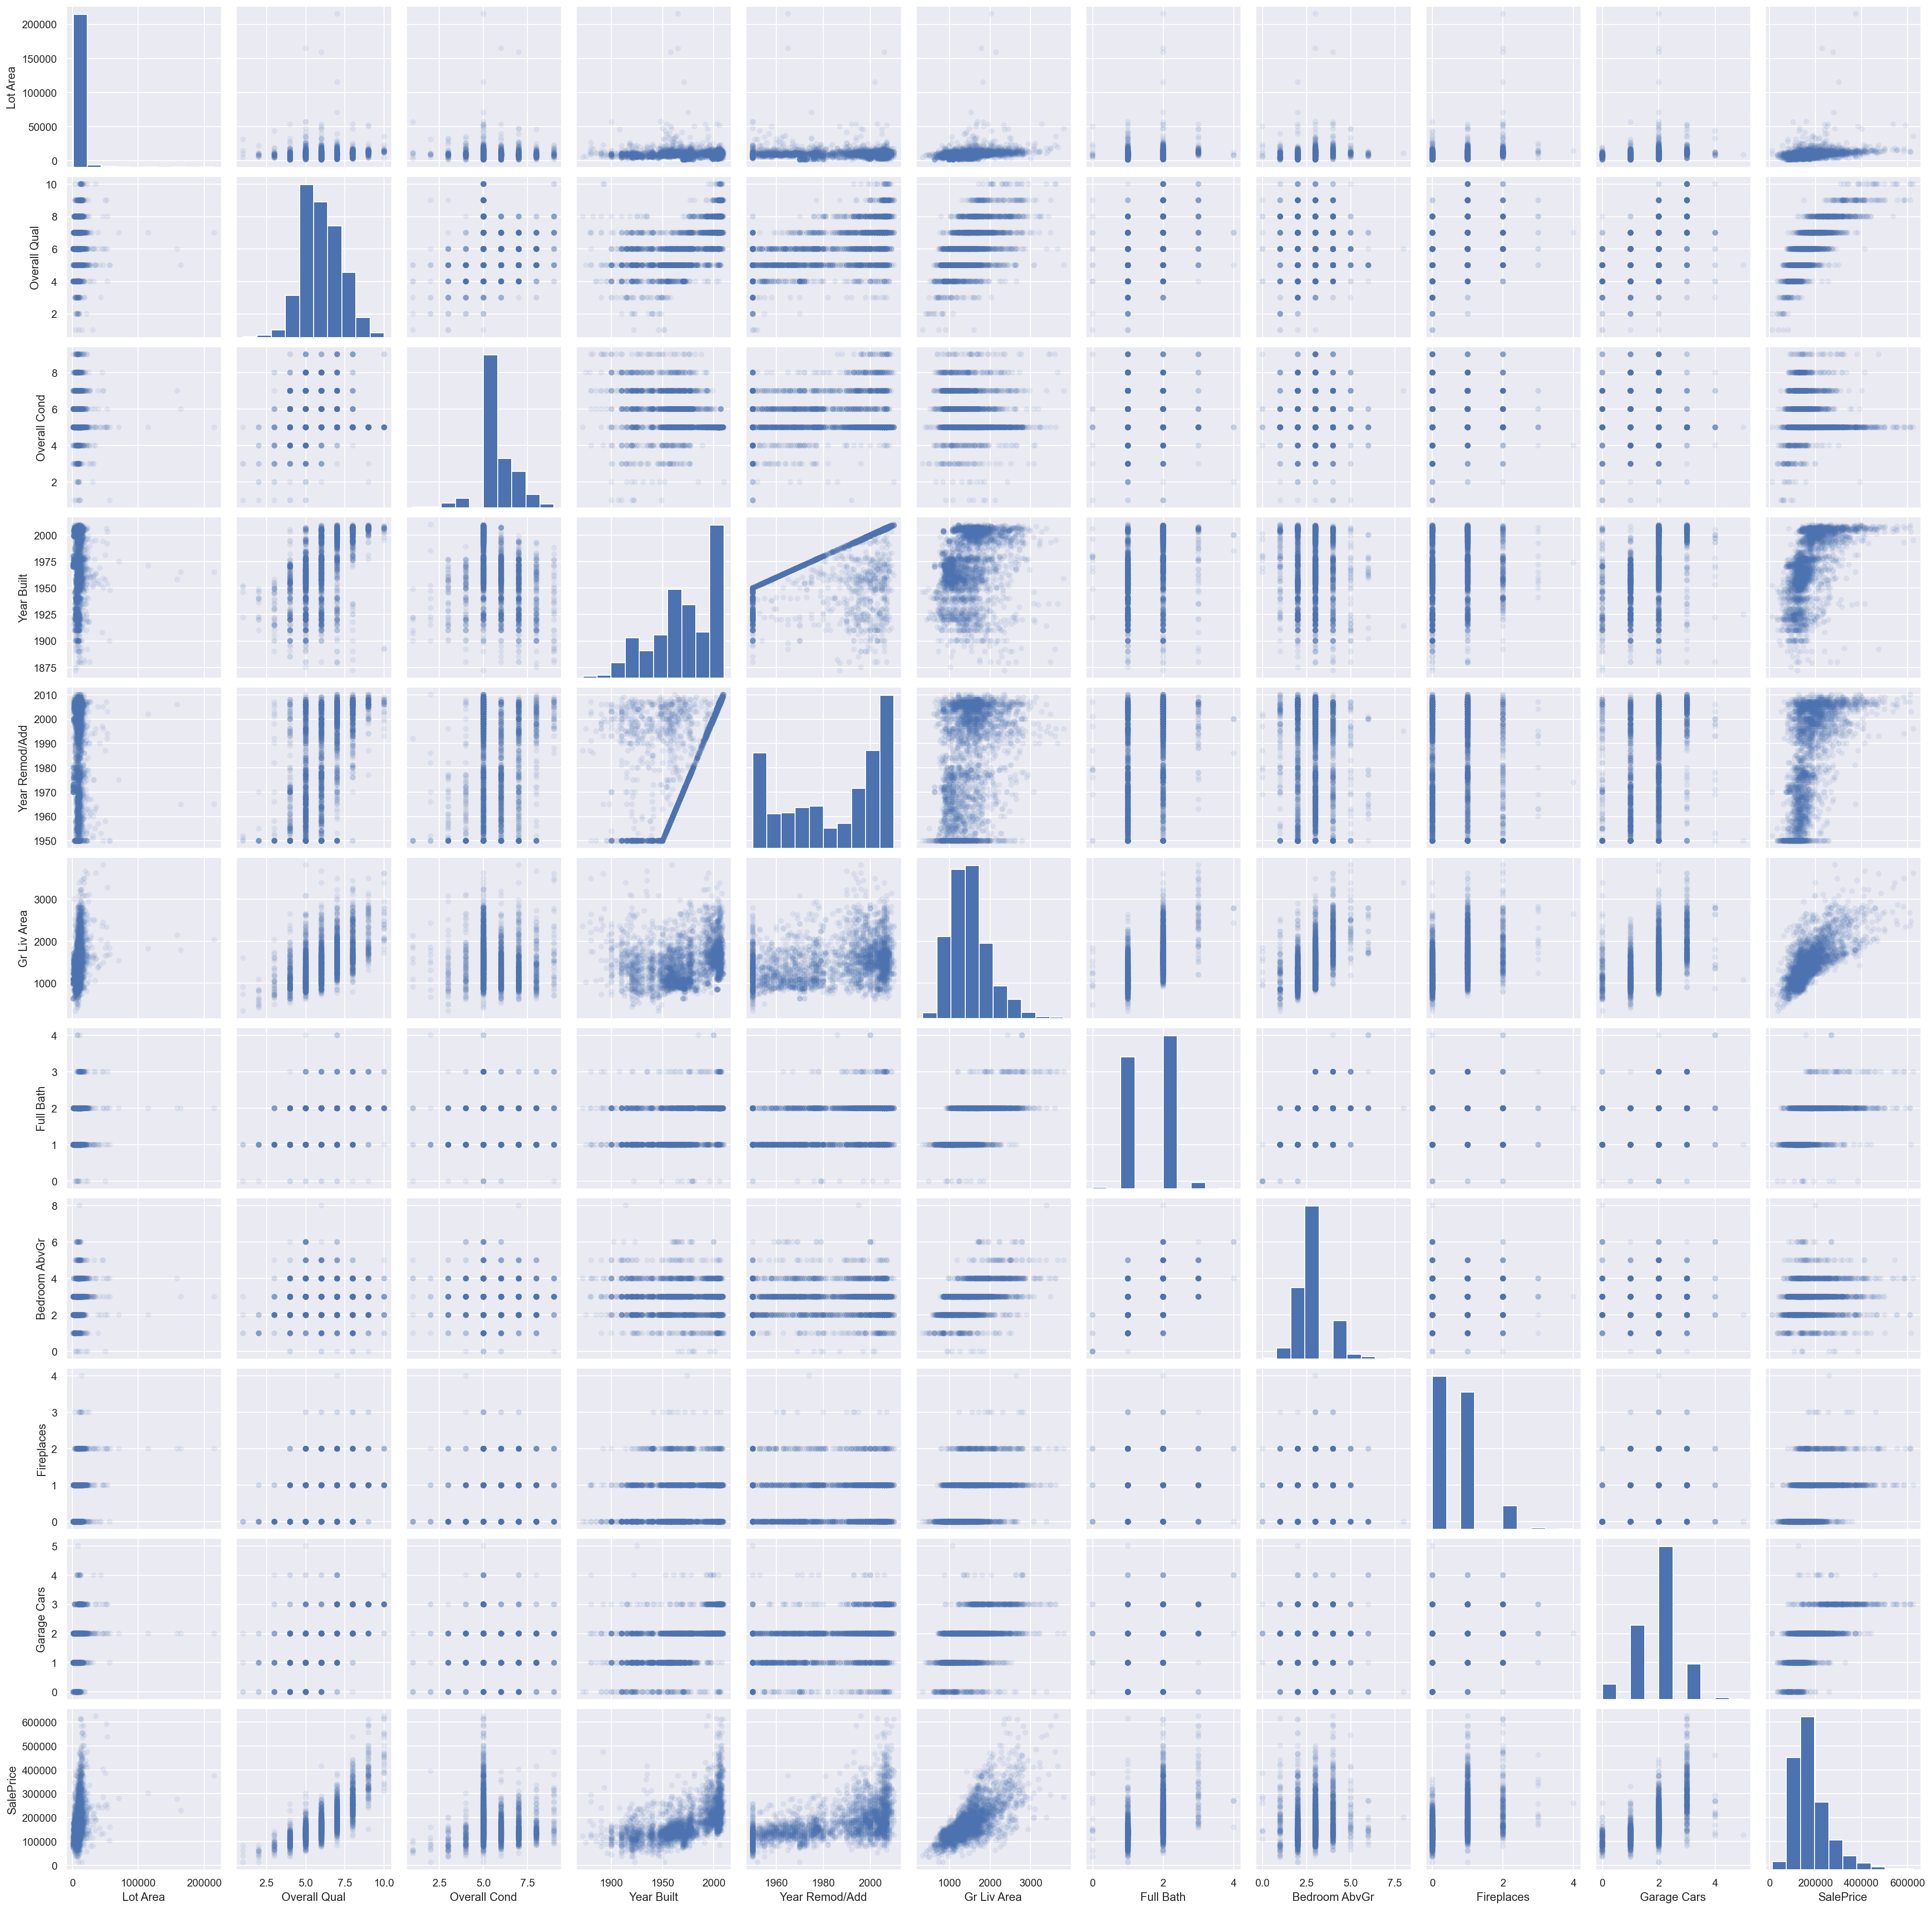

In [31]:
sns.pairplot(small_df, plot_kws = dict(alpha = 0.1,
                                      edgecolor = "none"))

**Discussion**
+ what is this plot telling about the distribution of target?
+ How to arrive conclusion about the relationship between features and the target?
+ How to arrive in a conclusion about any of the model suits this dataset problem like linear regression, or any one?
+ Is there any feature transformation techniques to do further?
+ What are relationship between various pairs of features?

Set Seperate variables for features and Target.

In [32]:
X = small_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y =small_df["SalePrice"]

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 331.4 KB


+ Now the feature variable and and target variable X, y are ready
+ Select a model and try modelling.
+ **Select model, fit, evaluate, fail, and fail again. Thats how it will work.**
+ Create **train/validation split** before fit and model.

**Basic Feature Engineering: Adding Polynomial and Interaction Terms**

+ Pairplot was evidence about the relationship between each feature and target.
+ features like 'Overall Qual' and _'Gr Liv Qual'_, there is an upward-curved relationship rather than a simple linear correspondence.
+ That points to add polynomial terms or transformations for those  features.
+ To express non-linear trends polynomial function is needed.

**Polynomial Features**

In [34]:
X2 = X.copy()

X2["OQ2"] = X2["Overall Qual"] ** 2
X2["GLA2"] = X2["Gr Liv Area"] ** 2

**Feature Interactions**

In [35]:
X3 = X2.copy()

## Multiplicative Interaction ##
X3["OQ_x_YB"] = X3["Overall Qual"] * X3["Year Built"]

## Division Interaction ##
X3["OQ_/_LA"] = X3["Overall Qual"] / X3["Lot Area"]

**Categories and Features derived from category Aggrgates**

+ Create a new feature column for each category value
+ Fill those columns with 1s and 0s to indicate which category is present for each row, the method is called dummy variables or one hot encoding.

In [36]:
data["House Style"].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [37]:
pd.get_dummies(df["House Style"], drop_first = True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [38]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [39]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)
other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [40]:
X4 = X3.copy()

In [41]:
X4["Neighborhood"] = df["Neighborhood"].replace(other_nbhs, "Other")

**Getting to Fancier Features**

Function to find relative features.

In [42]:
def add_deviation_feature(X, feature, category):
    
    ## temp groupby object ##
    category_gb = X.groupby(category)[feature]
    
    ## Create category means and std deviations for each observations ##
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    ## Compute stds from category mean for each feature value, ##
    ## add to X as new feature ##
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + "_Dev_" + category] = deviation_feature

Let's use our feature generation code to add 2 new deviation features, and run a final benchmark

In [43]:
X5 = X4.copy()
X5["House Style"] = df["House Style"]
add_deviation_feature(X5, "Year Built", "House Style")
add_deviation_feature(X5, "Overall Qual", "Neighborhood")

**Polynomial Features in Scikit-Learn**

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf = PolynomialFeatures(degree = 2)

In [47]:
features = ["Lot Area", "Overall Qual"]
pf.fit(df[features])

PolynomialFeatures()

In [48]:
pf.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [49]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features = features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2920,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2921,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2922,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2923,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


These are the Basic Feature Engineerning Techniques.
Much more to Learn on this topic.